In [195]:
import pandas as pd

In [196]:
df=pd.read_csv('temperatures.csv') #reading csv file
df

,Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,TT_TU_MN009,2014,201501010000,3.4,7,6
1,TT_TU_MN009,2014,201501010100,3.1,7,6
2,TT_TU_MN009,2014,201501010200,2.6,7,1
3,TT_TU_MN009,2014,201501010300,2.8,7,1
4,TT_TU_MN009,2014,201501010400,2.5,7,1
...,...,...,...,...,...,...
45163,TT_TU_MN009,2014,202002251900,5.3,0,1
45164,TT_TU_MN009,2014,202002252000,5.5,0,1
45165,TT_TU_MN009,2014,202002252100,5.4,0,1
45166,TT_TU_MN009,2014,202002252200,3.8,0,1


In [197]:
# dropping few columns
df.drop('Produkt_Code', inplace=True, axis=1)

df.drop('SDO_ID', inplace=True, axis=1)

df.drop('Qualitaet_Niveau', inplace=True, axis=1)

df.drop('Qualitaet_Byte', inplace=True, axis=1)


In [198]:
#Renaming columns
df= df.rename(columns={"Zeitstempel":"time stamp","Wert":"Value"})

In [199]:
import datetime, time
#changing timestamp format
df['time stamp'] = pd.to_datetime(df['time stamp'], format='%Y%m%d%H%M')
df

,time stamp,Value
0,2015-01-01 00:00:00,3.4
1,2015-01-01 01:00:00,3.1
2,2015-01-01 02:00:00,2.6
3,2015-01-01 03:00:00,2.8
4,2015-01-01 04:00:00,2.5
...,...,...
45163,2020-02-25 19:00:00,5.3
45164,2020-02-25 20:00:00,5.5
45165,2020-02-25 21:00:00,5.4
45166,2020-02-25 22:00:00,3.8


In [200]:
df = df.resample('15Min',on='time stamp').mean().interpolate('linear')
#resampling timestamp to 15 minutes and interploating linearly
#source:https://kanoki.org/2020/04/14/resample-and-interpolate-time-series-data/
df=df.reset_index() #resetting index

In [201]:
#creating new column using apply and lambda
df['year'] = df.apply(lambda x:x['time stamp'].year,axis=1)
#source: https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/
df

,time stamp,Value,year
0,2015-01-01 00:00:00,3.400,2015
1,2015-01-01 00:15:00,3.325,2015
2,2015-01-01 00:30:00,3.250,2015
3,2015-01-01 00:45:00,3.175,2015
4,2015-01-01 01:00:00,3.100,2015
...,...,...,...
180664,2020-02-25 22:00:00,3.800,2020
180665,2020-02-25 22:15:00,3.750,2020
180666,2020-02-25 22:30:00,3.700,2020
180667,2020-02-25 22:45:00,3.650,2020


In [202]:
df1 = df.groupby('year').agg({'Value': ['min', 'max']})
#using groupby and agrregrate function to find hottest and coldest temperatures of each year
result

,min,max
year,,
2015,-6.6,36.0
2016,-12.0,34.0
2017,-10.5,31.9
2018,-11.8,35.6
2019,-9.0,37.4
2020,-4.6,17.7


In [203]:
df1.columns = df1.columns.droplevel() #dropping one column level
df1= df1.rename(columns={"min": "Coldest", "max": "Hottest"}) #renaming columns
df1

,Coldest,Hottest
year,,
2015,-6.6,36.0
2016,-12.0,34.0
2017,-10.5,31.9
2018,-11.8,35.6
2019,-9.0,37.4
2020,-4.6,17.7


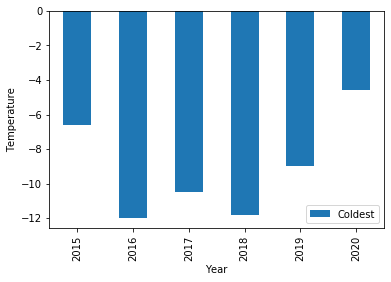

In [207]:
df1.Coldest.plot(kind='bar')
import matplotlib.pyplot as plt
plt.xlabel('Year')
plt.ylabel("Temperature")
plt.legend()
plt.savefig('coldest.png')

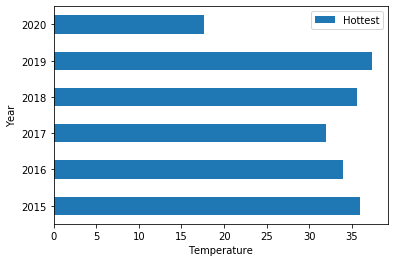

In [208]:
df1.Hottest.plot(kind='barh')

plt.ylabel('Year')
plt.xlabel("Temperature")
plt.legend()
plt.savefig('Hottest.png')